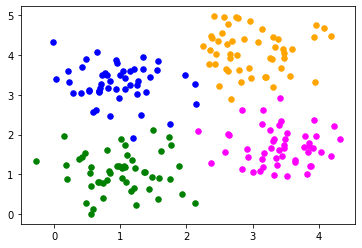

In [15]:
#20BHI10028 - TUSHAR MISRA
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

n_samples = 200
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
data, labels = make_blobs(n_samples=n_samples, 
                          centers=blob_centers, 
                          cluster_std=0.5,
                          random_state=0)


colours = ('green', 'orange', "blue", "magenta")
fig, ax = plt.subplots()

for n_class in range(len(blob_centers)):
    ax.scatter(data[labels==n_class][:, 0], 
               data[labels==n_class][:, 1], 
               c=colours[n_class], 
               s=30, 
               label=str(n_class))

In [16]:
from sklearn.model_selection import train_test_split
datasets = train_test_split(data, 
                            labels,
                            test_size=0.2)

train_data, test_data, train_labels, test_labels = datasets

In [17]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', 
                    alpha=1e-5,
                    hidden_layer_sizes=(6,), 
                    random_state=1)

clf.fit(train_data, train_labels)    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(6,), random_state=1,
              solver='lbfgs')

In [18]:
clf.score(train_data, train_labels)


0.99375

In [19]:
from sklearn.metrics import accuracy_score

predictions_train = clf.predict(train_data)
predictions_test = clf.predict(test_data)
train_score = accuracy_score(predictions_train, train_labels)
print("score on train data: ", train_score)
test_score = accuracy_score(predictions_test, test_labels)
print("score on test data: ", test_score)

score on train data:  0.99375
score on test data:  0.975


In [20]:
predictions_train[:20]

array([0, 1, 0, 3, 3, 3, 3, 2, 3, 0, 3, 1, 1, 0, 1, 0, 0, 3, 0, 2])

In [21]:
from sklearn.neural_network import MLPClassifier
X = [[0., 0.], [0., 1.], [1., 0.], [1., 1.]]
y = [0, 0, 0, 1]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

print(clf.fit(X, y))  

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')


In [22]:
print("weights between input and first hidden layer:")
print(clf.coefs_[0])
print("\nweights between first hidden and second hidden layer:")
print(clf.coefs_[1])

weights between input and first hidden layer:
[[-0.14203691 -1.18304359 -0.85567518 -4.53250719 -0.60466275]
 [-0.69781111 -3.5850093  -0.26436018 -4.39161248  0.06644423]]

weights between first hidden and second hidden layer:
[[ 0.29179638 -0.14155284]
 [ 4.02666592 -0.61556475]
 [-0.51677234  0.51479708]
 [ 7.37215202 -0.31936965]
 [ 0.32920668  0.64428109]]


In [23]:
print("w0 = ", clf.coefs_[0][0][0])
print("w1 = ", clf.coefs_[0][1][0])

w0 =  -0.1420369126782716
w1 =  -0.6978111149778672


In [24]:
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

0 0 [-0.14203691 -0.69781111], 
0 1 [-1.18304359 -3.5850093 ], 
0 2 [-0.85567518 -0.26436018], 
0 3 [-4.53250719 -4.39161248], 
0 4 [-0.60466275  0.06644423], 

1 0 [ 0.29179638  4.02666592 -0.51677234  7.37215202  0.32920668], 
1 1 [-0.14155284 -0.61556475  0.51479708 -0.31936965  0.64428109], 

2 0 [-4.96774269 -0.86330397], 



In [25]:
print("Bias values for first hidden layer:")
print(clf.intercepts_[0])
print("\nBias values for second hidden layer:")
print(clf.intercepts_[1])

Bias values for first hidden layer:
[-0.14962269 -0.59232707 -0.5472481   7.02667699 -0.87510813]

Bias values for second hidden layer:
[-3.61417672 -0.76834882]


In [26]:
result = clf.predict([[0, 0], [0, 1], 
                      [1, 0], [0, 1], 
                      [1, 1], [2., 2.],
                      [1.3, 1.3], [2, 4.8]])

In [27]:
prob_results = clf.predict_proba([[0, 0], [0, 1], 
                                  [1, 0], [0, 1], 
                                  [1, 1], [2., 2.], 
                                  [1.3, 1.3], [2, 4.8]])
print(prob_results)

[[1.00000000e+000 5.25723951e-101]
 [1.00000000e+000 3.71534882e-031]
 [1.00000000e+000 6.47069178e-029]
 [1.00000000e+000 3.71534882e-031]
 [2.07145538e-004 9.99792854e-001]
 [2.07145538e-004 9.99792854e-001]
 [2.07145538e-004 9.99792854e-001]
 [2.07145538e-004 9.99792854e-001]]
